## Slide 30 - AFN

### Definição Informal

Um **Autômato Finito Não-determinístico (AFN)** é uma generalização dos autômatos finitos determinísticos (AFD). Enquanto em um AFD cada par de estado e símbolo de entrada leva a no máximo um estado seguinte, um AFN permite transições para múltiplos estados para o mesmo par de estado e símbolo de entrada. Isso introduz a possibilidade de várias computações possíveis para uma mesma palavra de entrada.
Autômatos Finitos Não-determinísticos oferecem uma forma poderosa e flexível de modelar sistemas que têm múltiplas possíveis respostas a uma entrada dada, sendo essenciais para entender conceitos mais avançados em teoria da computação e processamento de linguagens formais.

**Exemplo de AFN e Computações Possíveis**

Consideremos um AFN simples ilustrado abaixo, juntamente com um diagrama mostrando as computações possíveis para a palavra "1010":

In [2]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


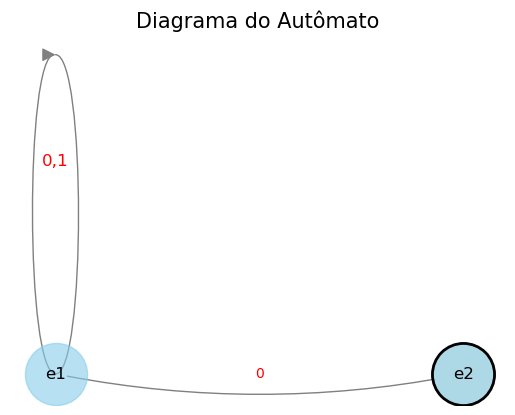

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar um grafo dirigido
G = nx.DiGraph()

# Adicionar os estados
G.add_node('e1')
G.add_node('e2')

# Adicionar arestas
G.add_edge('e1', 'e1', label='0,1')
G.add_edge('e1', 'e2', label='0')

# Layout específico
pos = {'e1': (0, 0), 'e2': (1, 0)}  # Posições manuais para os nós

# Desenho do grafo
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Estados finais ajustados para visualização
nx.draw_networkx_nodes(G, pos, nodelist=['e2'], node_shape='o', node_size=2000, node_color='lightblue', edgecolors='black', linewidths=2)

# Desenho das arestas com labels
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', connectionstyle='arc3,rad=0.1')

# Ajuste manual para a posição do label do loop
label_pos = pos['e1'][0], pos['e1'][1] + 0.1  # Posição ajustada para o loop
plt.text(label_pos[0], label_pos[1], '0,1', horizontalalignment='center', verticalalignment='center', color='red', fontsize=12)

# Corrigindo a chamada para desenho dos rótulos das outras arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels={('e1', 'e2'): '0'}, font_color='red')

# Ajustes finais e mostrar o gráfico
plt.title('Diagrama do Autômato', size=15)
plt.axis('off')  # Desativar os eixos
plt.show()


**Análise do AFN**

- O AFN mostrado pode processar a palavra "1010" seguindo diferentes caminhos através do autômato, como ilustrado no diagrama da árvore de computação.
- Para cada símbolo da palavra de entrada, o autômato pode transitar para um ou mais estados, dependendo das transições definidas para o símbolo e estado atual.

**Linguagem Reconhecida pelo AFN**

O AFN exemplificado acima é projetado para reconhecer palavras que:
- Contêm qualquer sequência de zeros e uns ($\{0,1\}^*$), terminando em '0'.

Em outras palavras, o autômato pode transitar da seguinte forma:
- Estado `e1` é o estado inicial. De `e1`, pode-se:
  - Transitar para si mesmo ao ler '0' ou '1'.
  - Transitar para `e2` ao ler '0'.
- Estado `e2` é o estado final, significando que qualquer palavra lida que termine em '0' e alcançe `e2` é aceita.

Ao processar a palavra "1010" com nosso AFN, observamos o seguinte comportamento:

- **Início**: Começa no estado `e1`.
- **Primeiro Símbolo ('1')**: Lê '1' e permanece em `e1`.
- **Segundo Símbolo ('0')**: Lê '0', podendo permanecer em `e1` ou transitar para `e2`.
- **Terceiro Símbolo ('1')**: Lê '1', necessariamente volta para `e1`.
- **Quarto Símbolo ('0')**: Lê '0', podendo permanecer em `e1` ou mover-se para `e2`.

A palavra "1010" é reconhecida pelo AFN porque existe uma computação válida que termina no estado final após consumir todos os símbolos da palavra:
e1 -> e1 -> e1 -> e2


## Definição Formal

Um **Autômato Finito Não-determinístico (AFN)** é formalmente definido como uma 5-tupla:

$M = (\Sigma, Q, \delta, q_0, F)$

onde:

- **$\Sigma$**: é o alfabeto de símbolos de entrada. Representa todos os símbolos que podem ser processados pelo autômato.
- **$Q$**: é um conjunto finito de estados possíveis do autômato. Estes são os diferentes estados pelos quais o autômato pode passar durante a execução.
- **$\delta$**: é a função de transição, definida como $\delta: Q \times \Sigma \to 2^Q$. Esta função determina para cada par de estado e símbolo de entrada, o conjunto de possíveis estados seguintes.
- **$q_0$**: é o estado inicial, tal que $q_0 \in Q$. É o ponto de partida para qualquer processamento de entrada.
- **$F$**: é o conjunto de estados finais, tal que $F \subseteq Q$. Se uma computação termina em algum desses estados após o processamento de toda a entrada, então a palavra é considerada aceita pelo autômato.

**Exemplo Ilustrativo**

Considere um AFN simples $M$ que reconhece sequências de binários que terminam em '0':

- $\Sigma = \{0, 1\}$
- $Q = \{q_0, q_1, q_2\}$
- $\delta$ é definida como:
  - $\delta(q_0, '0') = \{q_0, q_1\}$
  - $\delta(q_0, '1') = \{q_0\}$
  - $\delta(q_1, '0') = \{q_2\}$
  - $\delta(q_1, '1') = \{\}$
  - $\delta(q_2, '0') = \{q_2\}$
  - $\delta(q_2, '1') = \{q_2\}$
- $q_0 = q_0$
- $F = \{q_2\}$

Este AFN não aceita todas as palavras dentro do conjuntos de exemplos "00", "10", "110", "1000", etc., que são todas sequências que terminam em '0'.

## Função Programa Estendida

Seja $M = (\Sigma, Q, \delta, q_0, F)$ um autômato finito não-determinístico. A função programa estendida, denotada por $\underline{\delta}: 2^Q \times \Sigma^* \to 2^Q$, é a extensão da função programa $\delta: Q \times \Sigma \to 2^Q$ para processar palavras inteiras em vez de apenas símbolos individuais.

**Definição Indutiva da Função Programa Estendida**

A função programa estendida $\underline{\delta}$ é definida indutivamente como segue:

- **Caso Base**: $\underline{\delta}(P, \epsilon) = P$
  - Aqui, $P$ é um conjunto de estados, e $\epsilon$ é a palavra vazia. A função retorna o próprio conjunto $P$ como o conjunto de estados alcançáveis.

- **Passo Indutivo**: $\underline{\delta}(P, aw) = \underline{\delta}(\bigcup_{q \in P} \delta(q, a), w)$
  - Neste caso, para um conjunto de estados $P$, um símbolo $a$, e uma palavra subsequente $w$, a função primeiro aplica $\delta$ a cada estado em $P$ com o símbolo $a$, combinando todos os resultados possíveis. Em seguida, aplica-se $\underline{\delta}$ recursivamente à palavra restante $w$.


### Exemplo 1 de Aplicação da Função Programa Estendida

Considere um conjunto de estados $\{q_1, q_2, \dots, q_n\}$ e um símbolo $a$. A aplicação da função programa estendida a este conjunto e símbolo é definida como:

$$
\underline{\delta}(\{q_1, q_2, \dots, q_n\}, a) = \delta(q_1, a) \cup \delta(q_2, a) \cup \dots \cup \delta(q_n, a)
$$

Este resultado compila todos os estados possíveis alcançáveis a partir de qualquer estado em $\{q_1, q_2, \dots, q_n\}$ ao processar o símbolo $a$, considerando todas as transições possíveis definidas por $\delta$.

### Exemplo 2 - Passo a Passo da Função Programa Estendida de um AFN

Suponhamos que temos um AFN $M = (\Sigma, Q, \delta, q_0, F)$ definido como segue:

- $\Sigma = \{0, 1\}$: alfabeto binário.
- $Q = \{q_0, q_1, q_2\}$: conjunto de estados.
- $\delta$: função de transição dada por:
  - $\delta(q_0, 0) = \{q_0\}$
  - $\delta(q_0, 1) = \{q_0, q_1\}$
  - $\delta(q_1, 0) = \{q_2\}$
  - $\delta(q_1, 1) = \{\}$
  - $\delta(q_2, 0) = \{\}$
  - $\delta(q_2, 1) = \{q_2\}$
- $q_0$: estado inicial.
- $F = \{q_2\}$: conjunto de estados finais.

**Processando a palavra "101" usando $\underline{\delta}$**

Vamos calcular $\underline{\delta}$ passo a passo para a palavra "101" começando do estado inicial $q_0$.

1. **Passo 1: Processar o primeiro símbolo '1'**
   - Começamos com o conjunto inicial $P = \{q_0\}$.
   - Aplicamos $\delta(q_0, 1)$:
     - $\delta(q_0, 1) = \{q_0, q_1\}$
   - Portanto, $\underline{\delta}(\{q_0\}, '1') = \{q_0, q_1\}$.

2. **Passo 2: Processar o segundo símbolo '0'**
   - Agora, $P = \{q_0, q_1\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo '0':
     - $\delta(q_0, 0) = \{q_0\}$
     - $\delta(q_1, 0) = \{q_2\}$
   - Combinando os resultados, temos $\underline{\delta}(\{q_0, q_1\}, '0') = \{q_0, q_2\}$.

3. **Passo 3: Processar o terceiro símbolo '1'**
   - Agora, $P = \{q_0, q_2\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo '1':
     - $\delta(q_0, 1) = \{q_0, q_1\}$
     - $\delta(q_2, 1) = \{q_2\}$
   - Combinando os resultados, temos $\underline{\delta}(\{q_0, q_2\}, '1') = \{q_0, q_1, q_2\}$.

**Conclusão**

O conjunto final de estados após processar "101" é $\{q_0, q_1, q_2\}$. Desde que $q_2$ está incluído no conjunto final e é um estado final, a palavra "101" é aceita pelo AFN.


### Exemplo 3 - Passo a Passo da Função Programa Estendida de um AFN

Considere o seguinte AFN $M = (\Sigma, Q, \delta, q_0, F)$:

- $\Sigma = \{a, b, c\}$: um alfabeto com três símbolos.
- $Q = \{q_0, q_1, q_2, q_3, q_4\}$: conjunto de cinco estados.
- $\delta$: função de transição definida como:
  - $\delta(q_0, a) = \{q_1\}$
  - $\delta(q_0, b) = \{q_2\}$
  - $\delta(q_1, a) = \{q_2\}$
  - $\delta(q_1, b) = \{q_3\}$
  - $\delta(q_1, c) = \{q_1, q_4\}$
  - $\delta(q_2, a) = \{q_0\}$
  - $\delta(q_2, b) = \{q_4\}$
  - $\delta(q_3, c) = \{q_2, q_3\}$
  - $\delta(q_4, a) = \{q_3\}$
  - $\delta(q_4, b) = \{q_2\}$
- $q_0$: estado inicial.
- $F = \{q_4\}$: conjunto de estados finais.

**Processando a palavra "abcab" usando $\underline{\delta}$**

Vamos calcular $\underline{\delta}$ passo a passo para a palavra "abcab" começando do estado inicial $q_0$.

1. **Passo 1: Processar o primeiro símbolo 'a'**
   - Inicialmente, $P = \{q_0\}$.
   - Aplicamos $\delta(q_0, a)$:
     - $\delta(q_0, a) = \{q_1\}$
   - Assim, $\underline{\delta}(\{q_0\}, 'a') = \{q_1\}$.

2. **Passo 2: Processar o segundo símbolo 'b'**
   - Agora, $P = \{q_1\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo 'b':
     - $\delta(q_1, b) = \{q_3\}$
   - Com isso, $\underline{\delta}(\{q_1\}, 'b') = \{q_3\}$.

3. **Passo 3: Processar o terceiro símbolo 'c'**
   - Agora, $P = \{q_3\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo 'c':
     - $\delta(q_3, c) = \{q_2, q_3\}$
   - Assim, $\underline{\delta}(\{q_3\}, 'c') = \{q_2, q_3\}$.

4. **Passo 4: Processar o quarto símbolo 'a'**
   - Agora, $P = \{q_2, q_3\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo 'a':
     - $\delta(q_2, a) = \{q_0\}$
     - Não há transição definida de $q_3$ com 'a'.
   - Resultando em, $\underline{\delta}(\{q_2, q_3\}, 'a') = \{q_0\}$.

5. **Passo 5: Processar o quinto símbolo 'b'**
   - Agora, $P = \{q_0\}$.
   - Aplicamos $\delta$ para cada estado em $P$ com o símbolo 'b':
     - $\delta(q_0, b) = \{q_2\}$
   - Portanto, $\underline{\delta}(\{q_0\}, 'b') = \{q_2\}$.

**Conclusão**

Após processar "abcab", o conjunto final de estados é $\{q_2\}$. Como $q_2$ não está incluído no conjunto de estados finais $F = \{q_4\}$, a palavra "abcab" não é aceita pelo AFN.


## Linguagens Aceitas e Rejeitadas por um AFN

Quando tratamos de Autômatos Finitos Não-determinísticos (AFNs), as definições de linguagens aceitas e rejeitadas são cruciais para entender como esses autômatos classificam e reconhecem sequências de entrada.

**Definição de Linguagem Aceita**

A linguagem aceita por um AFN $M = (\Sigma, Q, \delta, q_0, F)$, denotada por $ACEITA(M)$ ou $L(M)$, é definida como o conjunto de todas as palavras sobre o alfabeto $\Sigma^*$ que são aceitas pelo autômato. Formalmente, uma palavra $w$ é aceita se existe pelo menos um caminho a partir do estado inicial $q_0$ que, após processar $w$, termina em algum estado final em $F$:

$$
ACEITA(M) = \{w \mid \text{existe } q \in \underline{\delta}(\{q_0\}, w) \text{ tal que } q \in F\}
$$

Esta definição implica que para uma palavra ser aceita, basta que haja ao menos uma sequência de transições válidas, a partir do estado inicial, que consuma todos os símbolos da palavra e alcance um estado final.

**Definição de Linguagem Rejeitada**

Analogamente, $REJEITA(M)$ é definida como o conjunto de todas as palavras do alfabeto $\Sigma^*$ que são rejeitadas pelo AFN. Uma palavra é rejeitada se todos os caminhos possíveis a partir do estado inicial, após processar a palavra, não terminam em um estado final:

$$
REJEITA(M) = \{w \mid \text{nenhum } q \in \underline{\delta}(\{q_0\}, w) \text{ está em } F\}
$$

**Exemplo Ilustrativo**

Considere um AFN $M = (\Sigma, Q, \delta, q_0, F)$ com:

- $\Sigma = \{a, b, c\}$
- $Q = \{q_0, q_1, q_2, q_3, q_4\}$
- $\delta$: função de transição definida como:
  - $\delta(q_0, a) = \{q_1\}$
  - $\delta(q_0, b) = \{q_2\}$
  - $\delta(q_1, a) = \{q_2\}$
  - $\delta(q_1, b) = \{q_3\}$
  - $\delta(q_1, c) = \{q_1, q_4\}$
  - $\delta(q_2, a) = \{q_0\}$
  - $\delta(q_2, b) = \{q_4\}$
  - $\delta(q_3, c) = \{q_2, q_3\}$
  - $\delta(q_4, a) = \{q_3\}$
  - $\delta(q_4, b) = \{q_2\}$
- Estado inicial $q_0$
- Conjunto de estados finais $F = \{q_4\}$

### Palavra "abac"

Vamos calcular $\underline{\delta}$ passo a passo para a palavra "abac" começando do estado inicial $q_0$:

1. **Passo 1: Processar 'a'**
   - Partindo de $q_0$, $\underline{\delta}(\{q_0\}, 'a') = \delta(q_0, 'a') = \{q_1\}$

2. **Passo 2: Processar 'b'**
   - De $q_1$, $\underline{\delta}(\{q_1\}, 'b') = \delta(q_1, 'b') = \{q_3\}$

3. **Passo 3: Processar 'a'**
   - De $q_3$, $\underline{\delta}(\{q_3\}, 'a') = \delta(q_3, 'a') = \{\}$ (nenhuma transição definida para 'a' de $q_3$)


**Conclusão para 'abac':** A palavra é rejeitada, pois além de eu não finalizar a leitura dos símbolos o conjunto final de estados $\{q_3\}$ não está incluído em $F = \{q_4\}$

Considere novamente nosso AFN com estados $\{q_0, q_1, q_2, q_3, q_4\}$ e alfabeto $\{a, b, c\}$. A palavra "abac" seria rejeitada, pois não existe um caminho a partir de $q_0$ que termina em $q_4$, um estado final. Em contrapartida, a palavra "abcb" seria aceita, pois existe um caminho a partir de $q_0 \to q_1 \to q_3 \to q_2 \to q_4$ que termina em $q_4$.

Estas definições ajudam a estabelecer claramente quais sequências de entrada um AFN pode aceitar ou rejeitar, baseando-se na estrutura de seus estados e transições, e são essenciais para a análise e o design de autômatos para aplicações práticas.

### Exemplo 1 

Considere a linguagem $L_5$, que inclui todas as palavras sobre o alfabeto $\Sigma = \{a, b\}$ que possuem "aa" ou "bb" como subpalavra. Um autômato finito não-determinístico (AFN) que reconhece esta linguagem é definido como segue:

- **Alfabeto**: $\Sigma = \{a, b\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_2, q_f\}$
- **Estado inicial**: $q_0$
- **Conjunto de estados finais**: $F = \{q_f\}$
- **Função de transição** $\delta_5$: Definida pela tabela a seguir.

**Tabela de Transições $\delta_5$**

| Estado Atual | Símbolo de Entrada | Estados Seguintes |
|--------------|--------------------|-------------------|
| $q_0$        | $a$                | $\{q_1\}$         |
| $q_0$        | $b$                | $\{q_2\}$         |
| $q_1$        | $a$                | $\{q_f\}$         |
| $q_1$        | $b$                | $\{q_2\}$         |
| $q_2$        | $a$                | $\{q_1\}$         |
| $q_2$        | $b$                | $\{q_f\}$         |
| $q_f$        | $a$                | $\{q_f\}$         |
| $q_f$        | $b$                | $\{q_f\}$         |


Esta tabela mostra como o autômato transita entre os estados dependendo do símbolo de entrada. Por exemplo, se o autômato está no estado $q_0$ e lê o símbolo 'a', ele transita para o estado $q_1$. Se estiver no estado $q_1$ e ler outro 'a', ele alcança o estado final $q_f$, indicando que a palavra contém "aa" como subpalavra.

**Como o Autômato Funciona**

- Partindo de $q_0$, o autômato transita para $q_1$ com a entrada 'a' ou para $q_2$ com a entrada 'b'.
- Em $q_1$, uma subsequente entrada 'a' leva a $q_f$, reconhecendo a subpalavra "aa".
- Em $q_2$, uma subsequente entrada 'b' também leva a $q_f$, reconhecendo a subpalavra "bb".
- Uma vez em $q_f$, o autômato permanece neste estado com qualquer entrada subsequente, refletindo que uma subpalavra válida foi encontrada e a palavra é aceita.

Este AFN efetivamente reconhece qualquer palavra que contenha as subpalavras "aa" ou "bb" e permanece no estado de aceitação uma vez que uma dessas condições é satisfeita.

### Exemplo 2

**Tabela de Transições Corrigida para o Autômato**

| Estado \ Símbolo | a       | b       |
|------------------|---------|---------|
| $q_0$            | $q_0, q_1$ | $q_0, q_2$ |
| $q_1$            | $q_f$     | -       |
| $q_2$            | -       | $q_f$     |
| $q_f$            | $q_f$     | $q_f$     |

**Descrição das Transições**

- **$q_0$**: 
  - Lendo 'a': Permanece em $q_0$ e também pode transitar para $q_1$.
  - Lendo 'b': Permanece em $q_0$ e também pode transitar para $q_2$.
- **$q_1$**: 
  - Lendo 'a': Transita para $q_f$, reconhecendo a sequência "aa".
- **$q_2$**: 
  - Lendo 'b': Transita para $q_f$, reconhecendo a sequência "bb".
- **$q_f$**: 
  - Lendo qualquer símbolo: Permanece em $q_f$, indicando que uma sequência válida foi encontrada e a palavra é aceita.

Este autômato efetivamente verifica a presença de "aa" ou "bb" em qualquer posição dentro de uma palavra, uma vez que reconhece a primeira ocorrência de tais sequências e então permanece em um estado de aceitação.


### Exemplo X - Autômato Finito Não-determinístico (AFN) para $\{w \mid w \text{ possui 'aaa' como sufixo}\}$

Este AFN é projetado para aceitar strings que terminam especificamente com o sufixo "aaa". O AFN segue um padrão de transição que assegura a leitura deste sufixo ao final de qualquer sequência de entrada.

**Definições Formais**

- **Alfabeto**: $\Sigma = \{a, b\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_2, q_3\}$
- **Estado inicial**: $q_0$ (observe que $q_6$ mencionado parece ser um erro, ajustado para $q_0$)
- **Conjunto de estados finais**: $F = \{q_3\}$
- **Função de transição** $\delta$: Definida como segue:

**Tabela de Transições**

| Estado | a     | b     |
|--------|-------|-------|
| q0     | q0, q1| q0    |
| q1     | q2    | -     |
| q2     | q3    | -     |
| q3     | q3    | -     | (tirar a transição e corrigir a descrição)

**Descrição das Transições**

- **q0**: Estado inicial que aceita 'a' ou 'b'. Transita para si mesmo com 'b' para continuar aceitando qualquer caractere. Transita para q1 com 'a' para começar a verificar o sufixo "aaa".
- **q1**: Após o primeiro 'a', espera por outro 'a' e transita para q2.
- **q2**: Após o segundo 'a' consecutivo, espera por um terceiro 'a' e transita para q3.
- **q3**: Estado final que, uma vez alcançado com o terceiro 'a', confirma que a string termina com "aaa". Qualquer 'a' subsequente mantém o estado em q3, enquanto 'b' não tem transição definida, significando que qualquer outro caractere finaliza a entrada invalidamente fora do sufixo "aaa".

**Considerações**

O autômato é desenhado para ser especialmente sensível ao final da entrada, assegurando que apenas as sequências terminando em "aaa" são aceitas. Qualquer desvio deste padrão específico resulta em uma rejeição da string.

### Exemplo 3 - Construa um AFD e um AFN que aceitem a linguagem {0, 1}∗1010

#### AFD

**Autômato Finito Determinístico (AFD) para a linguagem $\{0, 1\}^*1010$**

O AFD será projetado para aceitar strings que terminam especificamente com a sequência "1010". Cada estado no AFD representa um progresso na sequência que estamos tentando reconhecer.

**Estados e Transições do AFD**

- **q0**: Estado inicial. Transita para q1 se '1' é lido; permanece em q0 se '0' é lido.
- **q1**: Espera por '0' após o primeiro '1'. Transita para q2 se '0' é lido.
- **q2**: Espera por '1' após "10". Transita para q3 se '1' é lido.
- **q3**: Espera por '0' após "101". Transita para q4 se '0' é lido.
- **q4**: Estado final. Capturou "1010".

**Definições formais para o AFD que aceita strings que terminam com a sequência "1010":**

- **Alfabeto**: $\Sigma = \{0, 1\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_2, q_3, q_4\}$
- **Estado inicial**: $q_0$
- **Conjunto de estados finais**: $F = \{q_4\}$
- **Função de transição** $\delta$: Definida pela tabela a seguir.

**Tabela de Transições**

| Estado | 0    | 1    |
|--------|------|------|
| q0     | q0   | q1   |
| q1     | q2   | q1   |
| q2     | q2   | q3   |
| q3     | q4   | q3   |
| q4     |  \-  |  \-  |

No AFD, uma vez que o estado q4 é alcançado, qualquer entrada subsequente ('0' ou '1') mantém o autômato nesse estado, indicando que a string foi aceita por terminar com "1010". (fazer correcoes)


#### AFN

**Autômato Finito Não-determinístico (AFN) para a linguagem $\{0, 1\}^*1010$**

O AFN para a mesma linguagem pode ser construído de maneira mais flexível, utilizando a não-determinística para iniciar a sequência "1010" em qualquer ponto da leitura da string.

**Estados e Transições do AFN**

- **q0**: Estado inicial e também estado normal de leitura. Transita para q1 se '1' é lido e também volta para si mesmo se '0' ou '1' é lido, permitindo iniciar a sequência "1010" em qualquer ponto.
- **q1**: Após ler o primeiro '1', espera por '0'. Transita para q2 se '0' é lido.
- **q2**: Após "10", espera por '1'. Transita para q3 se '1' é lido.
- **q3**: Após "101", espera por '0'. Transita para q4 se '0' é lido.
- **q4**: Estado final que representa a aceitação da sequência "1010".

**Definições formais para o AFN que aceita strings terminando com a sequência "1010":**

- **Alfabeto**: $\Sigma = \{0, 1\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_2, q_3, q_4\}$
- **Estado inicial**: $q_0$
- **Conjunto de estados finais**: $F = \{q_4\}$
- **Função de transição** $\delta$: Definida pela tabela a seguir.

**Tabela de Transições**

| Estado | 0      | 1      |
|--------|--------|--------|
| q0     | q0     | q0, q1 |
| q1     | q2     | \-     |
| q2     | \-     | q3     |
| q3     | q4     | \-     |
| q4     | \-     | \-     |

No AFN, o estado q0 é não-determinístico e permite a transição para o estado q1 em qualquer ponto onde um '1' é lido, iniciando a sequência "1010", enquanto continua lendo outras partes da string.


### Exemplo 4 - Defina uma AFD e uma AFN que aceita strings onde o terceiro símbolo a partir da direita é '1'

#### AFD

Este AFD aceitará strings do alfabeto $\{0,1\}^*$ onde a terceira posição da direita para a esquerda é '1'.

**Definições formais**
- **Alfabeto**: $\Sigma = \{0, 1\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_{01}, q_{10}, q_{11}, q_{100}, q_{101}, q_{110}, q_{111}, q_f\}$
- **Estado inicial**: $q_0$
- **Conjunto de estados finais**: $F = \{q_{101}, q_{100}, q_{111}, q_{110}\}$
- **Função de transição** $\delta$:

**Tabela de Transições**

| Estado | 0        | 1        |
|--------|----------|----------|
| q0     | q0       | q1       |
| q1     | q_{10}   | q_{11}   |
| q_{10} | q_{100}  | q_{101}  |
| q_{11} | q_{110}  | q_{111}  |
| q_{100}|  \-      |  \-      |
| q_{101}|  \-      |  \-      |
| q_{110}|  \-      |  \-      |
| q_{111}|  \-      |  \-      |

Este AFD move-se através dos estados à medida que lê cada dígito, armazenando os três últimos dígitos lidos. O estado final \(q_f\) é atingido e mantido uma vez que a string termina corretamente com o terceiro último dígito sendo '1'.

#### AFN

Este AFN aceitará strings do alfabeto $\{0,1\}^*$ onde a terceira posição da direita para a esquerda é '1'.

**Definições formais**
- **Alfabeto**: $\Sigma = \{0, 1\}$
- **Conjunto de estados**: $Q = \{q_0, q_1, q_2, q_3\}$
- **Estado inicial**: $q_0$
- **Conjunto de estados finais**: $F = \{q_3\}$
- **Função de transição** $\delta$: Detalhada na tabela abaixo.

**Tabela de Transições**

| Estado | 0           | 1           |
|--------|-------------|-------------|
| q0     | q0, q1      | q1          |
| q1     | q2          | q2          |
| q2     | q3          | q3          |
| q3     | -           | -           |

**Descrição do Funcionamento**

- **q0**: Estado inicial, transita para si mesmo com qualquer leitura ('0' ou '1'), iniciando a contagem ao ler '1' para q1. 
- **q1**: Este estado espera pelo próximo símbolo, transita para q2 com a leitura de '0' ou '1'.
- **q2**: Transita para q3 com a leitura de '0' ou '1'.
- **q3**: Estado final, não possui transições subsequentes, indicando que a sequência termina com '1' como o terceiro último símbolo.

Este AFN começa a monitorar a entrada para uma possível sequência terminando com '1' no terceiro último lugar a partir do momento em que '1' é lido em q0. Após entrar em q1 e q2, ele verifica se o terceiro símbolo (em q3) é '1', confirmando a aceitação da string. Uma vez em q3, nenhuma entrada adicional altera o estado, o que satisfaz a condição da linguagem definida.

## Slide 43 - Equivalência de AFNs e AFDs

Autômatos Finitos Não-determinísticos têm a capacidade de "escolher" entre múltiplas transições possíveis sem especificar qual caminho seguir.  
**Vantagens:**  
- Simplicidade de design
    - construção
    - aprendizagem
    - entendimento
- Paralelizar os caminhos possíveis de um AFN
    - eficiência          
    
**Desvantagens:**  
- Implementação
    - complexidade
    - concorrência

Na prática, essa eficiência depende da capacidade de implementar esse paralelismo efetivamente. Em sistemas onde o paralelismo é limitado ou a sobrecarga de gerenciar múltiplos caminhos paralelos é significativa, a conversão de um AFN para um AFD pode resultar em uma implementação mais simples e, potencialmente, mais rápida, devido à natureza determinística dos AFDs, que seguem um único caminho de estados para cada cadeia de entrada


Esta aula aborda como converter um Autômato Finito Não-determinístico (AFN) para um Autômato Finito Determinístico (AFD) usando o método de construção de subconjuntos. O processo permite que AFNs sejam convertidos para AFDs equivalentes que aceitam a mesma linguagem.

**Definições Iniciais**

- **AFN** $M = (\Sigma, Q, \delta, q_0, F)$
  - $\Sigma$: alfabeto de entrada
  - $Q$: conjunto de estados do AFN
  - $\delta$: função de transição do AFN
  - $q_0$: estado inicial do AFN
  - $F$: conjunto de estados finais do AFN

- **AFD Convertido** $M' = (\Sigma, Q', \delta', \langle q_0 \rangle, F')$
  - $\Sigma$: mesmo alfabeto de entrada
  - $Q'$: conjunto de todas as combinações dos estados de $Q$
  - $\delta'$: função de transição do AFD
  - $\langle q_0 \rangle$: estado inicial do AFD
  - $F'$: conjunto de estados finais do AFD

**Processo de Conversão**

1. **Conjunto de Estados $Q'$**: Cada estado em $Q'$ é um conjunto de estados de $Q$, representando todas as possíveis combinações de estados que o AFN pode alcançar em um dado momento. Estados são denotados como $\langle q_1q_2...q_n \rangle$, onde cada $q_i$ é um estado de $Q$.

2. **Função de Transição $\delta'$**: Para cada estado combinado $\langle q_1...q_n \rangle$ e cada símbolo $a \in \Sigma$, $\delta'(\langle q_1...q_n \rangle, a)$ é calculado tomando a união de $\delta(q_i, a)$ para cada $i$. Isso resulta em um novo conjunto de estados que o AFD pode alcançar a partir do conjunto atual no símbolo lido.

3. **Estado Inicial $\langle q_0 \rangle$**: O estado inicial do AFD é o conjunto que contém apenas o estado inicial do AFN.

4. **Conjunto de Estados Finais $F'$**: Um estado combinado $\langle q_1...q_n \rangle$ pertence a $F'$ se pelo menos um dos $q_i$ é um estado final em $F$.  
  
**Exemplo Prático**

Suponha um AFN simples $M$ com:
- Estados: $\{q_0, q_1, q_2\}$
- Alfabeto: $\{a, b\}$
- Transições:
  - $\delta(q_0, a) = \{q_0, q_1\}$
  - $\delta(q_0, b) = \{q_0, q_2\}$
  - $\delta(q_1, a) = \{q_2\}$
  - $\delta(q_1, b) = \{q_1\}$
  - $\delta(q_2, a) = \{q_1\}$
  - $\delta(q_2, b) = \{q_2\}$
- Estado inicial: $q_0$
- Estados finais: $\{q_2\}$

Vamos converter este AFN para um AFD usando o método de construção de subconjuntos.

### Passo a Passo da Conversão

1. **Identificar o estado inicial do AFD**:
   - O estado inicial do AFD é $\langle q_0 \rangle$.

2. **Calcular as transições para cada símbolo a partir de $\langle q_0 \rangle$**:
   - $\delta'(\langle q_0 \rangle, a) = \langle q_0, q_1 \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$)
   - $\delta'(\langle q_0 \rangle, b) = \langle q_0, q_2 \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$)

3. **Calcular as transições para cada novo estado combinado**:
   - $\delta'(\langle q_0, q_1 \rangle, a) = \langle q_0, q_1, q_2 \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$ e $\delta(q_1, a) = \{q_2\}$)
   - $\delta'(\langle q_0, q_1 \rangle, b) = \langle q_0, q_1, q_2 \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$ e $\delta(q_1, b) = \{q_1\}$)
   - $\delta'(\langle q_0, q_2 \rangle, a) = \langle q_0, q_1 \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$ e $\delta(q_2, a) = \{q_1\}$)
   - $\delta'(\langle q_0, q_2 \rangle, b) = \langle q_0, q_2 \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$ e $\delta(q_2, b) = \{q_2\}$)
   - $\delta'(\langle q_1, q_2 \rangle, a) = \langle q_1, q_2 \rangle$ (porque $\delta(q_1, a) = \{q_2\}$ e $\delta(q_2, a) = \{q_1\}$)
   - $\delta'(\langle q_1, q_2 \rangle, b) = \langle q_1, q_2 \rangle$ (porque $\delta(q_1, b) = \{q_1\}$ e $\delta(q_2, b) = \{q_2\}$)

4. **Construir a tabela de transições do AFD**:

| Estado                   | a                       | b                       |
|--------------------------|-------------------------|-------------------------|
| $\langle q_0 \rangle$    | $\langle q_0, q_1 \rangle$ | $\langle q_0, q_2 \rangle$ |
| $\langle q_0, q_1 \rangle$ | $\langle q_0, q_1, q_2 \rangle$ | $\langle q_0, q_1, q_2 \rangle$ |
| $\langle q_0, q_2 \rangle$ | $\langle q_0, q_1 \rangle$ | $\langle q_0, q_2 \rangle$ |
| $\langle q_0, q_1, q_2 \rangle$ | $\langle q_0, q_1, q_2 \rangle$ | $\langle q_0, q_1, q_2 \rangle$ |
| $\langle q_1, q_2 \rangle$ | $\langle q_1, q_2 \rangle$ | $\langle q_1, q_2 \rangle$ |

5. **Definir os estados finais do AFD**:
   - Os estados finais do AFD são aqueles que contêm pelo menos um estado final do AFN. Portanto, os estados finais do AFD são:
     - $\langle q_0, q_2 \rangle$
     - $\langle q_0, q_1, q_2 \rangle$
     - $\langle q_1, q_2 \rangle$

In [1]:
## Diagrama de Estados do AFD


# Importando a biblioteca necessária
import graphviz

# Criando um objeto Digraph
dot = graphviz.Digraph()

# Adicionando os estados
states = ['q0', 'q0q1', 'q0q2', 'q0q1q2', 'q1q2']
final_states = ['q0q2', 'q0q1q2', 'q1q2']
for state in states:
    if state in final_states:
        dot.node(state, state, shape='doublecircle')
    else:
        dot.node(state, state, shape='circle')

# Adicionando as transições
transitions = {
    'q0': {'a': 'q0q1', 'b': 'q0q2'},
    'q0q1': {'a': 'q0q1q2', 'b': 'q0q1q2'},
    'q0q2': {'a': 'q0q1', 'b': 'q0q2'},
    'q0q1q2': {'a': 'q0q1q2', 'b': 'q0q1q2'},
    'q1q2': {'a': 'q1q2', 'b': 'q1q2'},
}

for state, paths in transitions.items():
    for symbol, target in paths.items():
        dot.edge(state, target, label=symbol)

# Visualizando o diagrama
dot.render('afd_diagram', format='png', view=True)


'afd_diagram.png'

In [2]:
## Diagrama de Estados do AFN

# Importando a biblioteca necessária
import graphviz

# Criando um objeto Digraph
dot = graphviz.Digraph()

# Adicionando os estados
states = ['q0', 'q1', 'q2']
final_states = ['q2']
for state in states:
    if state in final_states:
        dot.node(state, state, shape='doublecircle')
    else:
        dot.node(state, state, shape='circle')

# Adicionando as transições
transitions = {
    'q0': {'a': ['q0', 'q1'], 'b': ['q0', 'q2']},
    'q1': {'a': ['q2'], 'b': ['q1']},
    'q2': {'a': ['q1'], 'b': ['q2']},
}

for state, paths in transitions.items():
    for symbol, targets in paths.items():
        for target in targets:
            dot.edge(state, target, label=symbol)

# Visualizando o diagrama
dot.render('afn_diagram', format='png', view=True)


'afn_diagram.png'

### Exercício 1

**Definições do AFN $M$**

- **Estados**: $\{q_0, q_1, q_2, q_f\}$
- **Alfabeto**: $\{a, b\}$
- **Transições**:
  - $\delta(q_0, a) = \{q_0, q_1\}$
  - $\delta(q_0, b) = \{q_0\}$
  - $\delta(q_1, a) = \{q_2\}$
  - $\delta(q_2, a) = \{q_f\}$
- **Estado inicial**: $q_0$
- **Estado final**: $q_f$

Vamos gerar o diagrama do AFN usando a biblioteca `graphviz`.

In [1]:
# Importando a biblioteca necessária
import graphviz

# Criando um objeto Digraph
dot = graphviz.Digraph()

# Adicionando os estados
states = ['q0', 'q1', 'q2', 'qf']
final_states = ['qf']
for state in states:
    if state in final_states:
        dot.node(state, state, shape='doublecircle')
    else:
        dot.node(state, state, shape='circle')

# Adicionando as transições
transitions = {
    'q0': {'a': ['q0', 'q1'], 'b': ['q0']},
    'q1': {'a': ['q2']},
    'q2': {'a': ['qf']},
}

for state, paths in transitions.items():
    for symbol, targets in paths.items():
        for target in targets:
            dot.edge(state, target, label=symbol)

# Visualizando o diagrama
dot.render('afn_diagram2', format='png', view=True)

'afn_diagram2.png'

**Definições do AFD $M$**

- **Estados**: $Q' = \{\langle q_0 \rangle, \langle q_0, q_1 \rangle, \langle q_0, q_2 \rangle, \langle q_0, q_1, q_2 \rangle, \langle q_0, q_1, q_2, q_f \rangle\}$
- **Alfabeto**: $\{a, b\}$
- **Transições**:

| Estado                         | a                                   | b                  |
|--------------------------------|-------------------------------------|--------------------|
| $\langle q_0 \rangle$          | $\langle q_0, q_1 \rangle$          | $\langle q_0 \rangle$  |
| $\langle q_0, q_1 \rangle$     | $\langle q_0, q_1, q_2 \rangle$     | $\langle q_0 \rangle$  |
| $\langle q_0, q_1, q_2 \rangle$| $\langle q_0, q_1, q_2, q_f \rangle$| $\langle q_0 \rangle$  |
| $\langle q_0, q_1, q_2, q_f \rangle$| $\langle q_0, q_1, q_2, q_f \rangle$| $\langle q_0 \rangle$  |

- **Estado inicial**: $\langle q_0 \rangle$
- **Estados finais**: $F' = \{\langle q_0, q_1, q_2, q_f \rangle\}$  

In [2]:
# Importando a biblioteca necessária
import graphviz

# Criando um objeto Digraph
dot = graphviz.Digraph()

# Adicionando os estados
states = ['q0', 'q0q1', 'q0q1q2', 'q0q1q2qf']
final_states = ['q0q1q2qf']
for state in states:
    if state in final_states:
        dot.node(state, state, shape='doublecircle')
    else:
        dot.node(state, state, shape='circle')

# Adicionando as transições
transitions = {
    'q0': {'a': 'q0q1', 'b': 'q0'},
    'q0q1': {'a': 'q0q1q2', 'b': 'q0'},
    'q0q1q2': {'a': 'q0q1q2qf', 'b': 'q0'},
    'q0q1q2qf': {'a': 'q0q1q2qf', 'b': 'q0'},
}

for state, paths in transitions.items():
    for symbol, target in paths.items():
        dot.edge(state, target, label=symbol)

# Visualizando o diagrama
dot.render('afd_diagram2', format='png', view=True)

'afd_diagram2.png'

### Exercício 2 - Exemplos de Processamento de Cadeias


1. **Processamento da cadeia "aabb"**:

   - Estado Inicial: $\langle q_0 \rangle$
   - Lê 'a': $\langle q_0 \rangle \rightarrow \langle q_0, q_1 \rangle$
   - Lê 'a': $\langle q_0, q_1 \rangle \rightarrow \langle q_0, q_1, q_2 \rangle$
   - Lê 'b': $\langle q_0, q_1, q_2 \rangle \rightarrow \langle q_0 \rangle$
   - Lê 'b': $\langle q_0 \rangle \rightarrow \langle q_0 \rangle$
   
   Estado Final: $\langle q_0 \rangle$ (não aceito, pois não é um estado final)

2. **Processamento da cadeia "aa"**:

   - Estado Inicial: $\langle q_0 \rangle$
   - Lê 'a': $\langle q_0 \rangle \rightarrow \langle q_0, q_1 \rangle$
   - Lê 'a': $\langle q_0, q_1 \rangle \rightarrow \langle q_0, q_1, q_2 \rangle$
   
   Estado Final: $\langle q_0, q_1, q_2 \rangle$ (não aceito, pois não é um estado final)

3. **Processamento da cadeia "aaab"**:

   - Estado Inicial: $\langle q_0 \rangle$
   - Lê 'a': $\langle q_0 \rangle \rightarrow \langle q_0, q_1 \rangle$
   - Lê 'a': $\langle q_0, q_1 \rangle \rightarrow \langle q_0, q_1, q_2 \rangle$
   - Lê 'a': $\langle q_0, q_1, q_2 \rangle \rightarrow \langle q_0, q_1, q_2, q_f \rangle$
   - Lê 'b': $\langle q_0, q_1, q_2, q_f \rangle \rightarrow \langle q_0 \rangle$

   Estado Final: $\langle q_0 \rangle$ (não aceito, pois não é um estado final)

4. **Processamento da cadeia "aaa"**:

   - Estado Inicial: $\langle q_0 \rangle$
   - Lê 'a': $\langle q_0 \rangle \rightarrow \langle q_0, q_1 \rangle$
   - Lê 'a': $\langle q_0, q_1 \rangle \rightarrow \langle q_0, q_1, q_2 \rangle$
   - Lê 'a': $\langle q_0, q_1, q_2 \rangle \rightarrow \langle q_0, q_1, q_2, q_f \rangle$
   
   Estado Final: $\langle q_0, q_1, q_2, q_f \rangle$ (aceito, pois é um estado final)

---

**Observações**

- O autômato finito não determinístico (AFN) pode estar em vários estados ao mesmo tempo devido às transições não determinísticas.
- A cadeia é aceita se ao final do processamento ela estiver em pelo menos um estado que pertença ao conjunto de estados finais $F'$.
- Neste exemplo, os estados finais contêm o estado $q_f$.
- No processamento da cadeia "aaa", o autômato termina no estado $\langle q_0, q_1, q_2, q_f \rangle$, que é um estado final, portanto a cadeia é aceita.
- A cadeia é aceita se, ao final do processamento, o autômato estiver em pelo menos um estado que pertença ao conjunto de estados finais $F'$.

### Exemplo 3: AFN para AFD

1. **AFN dado:**

   - Conjunto de estados: $\{q_0, q_1, q_f\}$
   - Alfabeto: $\{0, 1\}$
   - Função de transição $\delta$:
     - $\delta(q_0, 0) = \{q_0, q_f\}$
     - $\delta(q_f, 0) = \{q_1\}$
     - $\delta(q_1, 1) = \{q_1\}$
     - $\delta(q_0, 1) = \{q_f\}$
     - $\delta(q_f, 1) = \{q_1\}$
   - Estado inicial: $q_0$
   - Estado final: $\{q_f\}$

2. **Construção do AFD correspondente:**

   - Conjunto de estados do AFD: $Q' = \{ \{q_0\}, \{q_0, q_f\}, \{q_f\}, \{q_1\}, \{q_1, q_f\}, \{q_0, q_1, q_f\} \}$
   - Estado inicial do AFD: $\{q_0\}$
   - Estados finais do AFD: $\{ \{q_f\}, \{q_0, q_f\}, \{q_1, q_f\}, \{q_0, q_1, q_f\} \}$

3. **Função de transição do AFD:**

   | Estado              | 0                      | 1                      |
   |---------------------|------------------------|------------------------|
   | $\{q_0\}$           | $\{q_0, q_f\}$         | $\{q_f\}$              |
   | $\{q_0, q_f\}$      | $\{q_0, q_1, q_f\}$    | $\{q_1, q_f\}$              |
   | $\{q_f\}$           | $\{q_1\}$              | $\{q_1\}$              |
   | $\{q_1\}$           | $\emptyset$            | $\{q_1\}$              |
   | $\{q_1, q_f\}$      | $\{q_1\}$              | $\{q_1\}$              |
   | $\{q_0, q_1, q_f\}$ | $\{q_0, q_1, q_f\}$    | $\{q_1, q_f\}$              |

---

In [30]:

from graphviz import Digraph

# Grafo do AFN
afn = Digraph('AFN', filename='afn', format='png')
afn.attr(rankdir='LR', size='8,5')

# Estados
afn.attr('node', shape='doublecircle')
afn.node('q_f')
afn.attr('node', shape='circle')
afn.node('q_0')
afn.node('q_1')

# Transições
afn.edge('q_0', 'q_0', label='0')
afn.edge('q_0', 'q_f', label='0')
afn.edge('q_0', 'q_f', label='1')
afn.edge('q_f', 'q_1', label='0')
afn.edge('q_f', 'q_1', label='1')
afn.edge('q_1', 'q_1', label='1')

afn.view()

'afn.png'

In [28]:
from graphviz import Digraph

# Grafo do AFD
afd = Digraph('AFD', filename='afd', format='png')
afd.attr(rankdir='LR', size='8,5')

# Estados
afd.attr('node', shape='doublecircle')
afd.node('q_f')
afd.node('q_0_q_f')
afd.node('q_1_q_f')
afd.node('q_0_q_1_q_f')
afd.attr('node', shape='circle')
afd.node('q_0')
afd.node('q_1')
afd.node('empty')

# Transições
afd.edge('q_0', 'q_0_q_f', label='0')
afd.edge('q_0', 'q_f', label='1')
afd.edge('q_0_q_f', 'q_0_q_1_q_f', label='0')
afd.edge('q_0_q_f', 'q_1_q_f', label='1')
afd.edge('q_1', 'empty', label='0')
afd.edge('q_1', 'q_1', label='1')
afd.edge('q_f', 'q_1', label='0')
afd.edge('q_f', 'q_1', label='1')
afd.edge('q_1_q_f', 'q_1', label='0')
afd.edge('q_1_q_f', 'q_1', label='1')
afd.edge('q_0_q_1_q_f', 'q_0_q_1_q_f', label='0')
afd.edge('q_0_q_1_q_f', 'q_1_q_f', label='1')

afd.view()

'afd.png'

### Exemplo 4: AFN para AFD

**Suponha um AFN simples $M$ com:** 
   - Conjunto de estados: $\{q_0, q_1, q_2, q_3, q_f\}$
   - Alfabeto: $\{0, 1\}$
   - Função de transição $\delta$:
     - $\delta(q_0, 0) = \{q_1\}$
     - $\delta(q_1, 0) = \{q_0\}$
     - $\delta(q_2, 0) = \{q_3\}$
     - $\delta(q_3, 0) = \{q_2\}$
     - $\delta(q_0, 1) = \{q_2, q_f\}$
     - $\delta(q_1, 1) = \{q_3, q_f\}$
     - $\delta(q_2, 1) = \{q_1, q_f\}$
     - $\delta(q_3, 1) = \{q_1, q_f\}$
   - Estado inicial: $q_0$
   - Estado final: $\{q_f\}$

Vamos converter este AFN para um AFD usando o método de construção de subconjuntos.
1. **Identificar o estado inicial do AFD**:
   - O estado inicial do AFD é $\langle q_0 \rangle$.

2. **Calcular as transições para cada símbolo a partir de $\langle q_0 \rangle$**:
   - $\delta'(\langle q_0 \rangle, 0) = \langle q_1 \rangle$ (porque $\delta(q_0, 0) = \{q_1\}$)
   - $\delta'(\langle q_0 \rangle, 1) = \langle q_2, q_f \rangle$ (porque $\delta(q_0, 1) = \{q_2, q_f\}$)

3. **Calcular as transições para cada novo estado combinado**:
   - $\delta'(\langle q_1 \rangle, 0) = \langle q_0 \rangle$ (porque $\delta(q_1, 0) = \{q_0\}$)
   - $\delta'(\langle q_1 \rangle, 1) = \langle q_3, q_f \rangle$ (porque $\delta(q_1, 1) = \{q_3, q_f\}$)
   - $\delta'(\langle q_2, q_f \rangle, 0) = \langle q_3 \rangle$ (porque $\delta(q_2, 0) = \{q_3\}$)
   - $\delta'(\langle q_2, q_f \rangle, 1) = \langle q_1, q_f \rangle$ (porque $\delta(q_2, 1) = \{q_1, q_f\}$)
   - $\delta'(\langle q_3 \rangle, 0) = \langle q_2 \rangle$ (porque $\delta(q_3, 0) = \{q_2\}$)
   - $\delta'(\langle q_3 \rangle, 1) = \langle q_1, q_f \rangle$ (porque $\delta(q_3, 1) = \{q_1, q_f\}$)
   - $\delta'(\langle q_3, q_f \rangle, 0) = \langle q_2 \rangle$ (porque $\delta(q_3, 0) = \{q_2\}$ e $\delta(q_f, 0) = \emptyset$)
   - $\delta'(\langle q_3, q_f \rangle, 1) = \langle q_1, q_f \rangle$ (porque $\delta(q_3, 1) = \{q_1, q_f\}$ e $\delta(q_f, 1) = \emptyset$)
   - $\delta'(\langle q_1, q_f \rangle, 0) = \langle q_0 \rangle$ (porque $\delta(q_1, 0) = \{q_0\}$ e $\delta(q_f, 0) = \emptyset$)
   - $\delta'(\langle q_1, q_f \rangle, 1) = \langle q_3, q_f \rangle$ (porque $\delta(q_1, 1) = \{q_3, q_f\}$ e $\delta(q_f, 1) = \emptyset$)

4. **Construir a tabela de transições do AFD**:

  | Estado                         | 0                       | 1                       |
  |-------------------------------|-------------------------|-------------------------|
  | $\langle q_0 \rangle$         | $\langle q_1 \rangle$   | $\langle q_2, q_f \rangle$ |
  | $\langle q_1 \rangle$         | $\langle q_0 \rangle$   | $\langle q_3, q_f \rangle$ |
  | $\langle q_2, q_f \rangle$    | $\langle q_3 \rangle$   | $\langle q_1, q_f \rangle$ |
  | $\langle q_3 \rangle$         | $\langle q_2 \rangle$   | $\langle q_1, q_f \rangle$ |
  | $\langle q_3, q_f \rangle$    | $\langle q_2 \rangle$   | $\langle q_1, q_f \rangle$ |
  | $\langle q_1, q_f \rangle$    | $\langle q_0 \rangle$   | $\langle q_3, q_f \rangle$ |

5. **Definir os estados finais do AFD**:
   - Os estados finais do AFD são aqueles que contêm pelo menos um estado final do AFN. Portanto, os estados finais do AFD são:
     - $\langle q_2, q_f \rangle$
     - $\langle q_1, q_f \rangle$
     - $\langle q_3, q_f \rangle$
     - $\langle q_f \rangle$

In [1]:
## Gerar o Diagrama do AFN
from graphviz import Digraph

# Grafo do AFN
afn = Digraph('AFN', filename='afn', format='png')
afn.attr(rankdir='LR', size='10,7')

# Estados
afn.attr('node', shape='doublecircle')
afn.node('q_f')

afn.attr('node', shape='circle')
afn.node('q_0')
afn.node('q_1')
afn.node('q_2')
afn.node('q_3')

# Transições
afn.edge('q_0', 'q_1', label='0')
afn.edge('q_0', 'q_2', label='1')
afn.edge('q_0', 'q_f', label='1')
afn.edge('q_1', 'q_0', label='0')
afn.edge('q_1', 'q_3', label='1')
afn.edge('q_1', 'q_f', label='1')
afn.edge('q_2', 'q_3', label='0')
afn.edge('q_2', 'q_1', label='1')
afn.edge('q_2', 'q_f', label='1')
afn.edge('q_3', 'q_2', label='0')
afn.edge('q_3', 'q_1', label='1')
afn.edge('q_3', 'q_f', label='1')

# Visualizar o grafo
afn.view()


'afn.png'

In [2]:
from graphviz import Digraph

# Grafo do AFD
afd = Digraph('AFD', filename='afd', format='png')
afd.attr(rankdir='LR', size='10,7')

# Estados
afd.attr('node', shape='doublecircle')
afd.node('q_2_q_f')
afd.node('q_1_q_f')
afd.node('q_3_q_f')
afd.node('q_f')

afd.attr('node', shape='circle')
afd.node('q_0')
afd.node('q_1')
afd.node('q_2')
afd.node('q_3')

# Transições
afd.edge('q_0', 'q_1', label='0')
afd.edge('q_0', 'q_2_q_f', label='1')
afd.edge('q_1', 'q_0', label='0')
afd.edge('q_1', 'q_3_q_f', label='1')
afd.edge('q_2_q_f', 'q_3', label='0')
afd.edge('q_2_q_f', 'q_1_q_f', label='1')
afd.edge('q_3', 'q_2', label='0')
afd.edge('q_3', 'q_1_q_f', label='1')
afd.edge('q_3_q_f', 'q_2', label='0')
afd.edge('q_3_q_f', 'q_1_q_f', label='1')
afd.edge('q_1_q_f', 'q_0', label='0')
afd.edge('q_1_q_f', 'q_3_q_f', label='1')

# Visualizar o grafo
afd.view()

'afd.png'

### Exemplo 5 - AFN para AFD

**Suponha um AFN simples $M$ com:**  
   - Conjunto de estados: $\{q_0, q_1, q_2, q_f\}$
   - Alfabeto: $\{a, b\}$
   - Função de transição $\delta$:
     - $\delta(q_0, a) = \{q_0, q_1\}$
     - $\delta(q_1, a) = \{q_f\}$
     - $\delta(q_f, a) = \{q_f\}$
     - $\delta(q_0, b) = \{q_0, q_2\}$
     - $\delta(q_2, b) = \{q_f\}$
     - $\delta(q_f, b) = \{q_f\}$
   - Estado inicial: $q_0$
   - Estado final: $\{q_f\}$

Vamos converter este AFN para um AFD usando o método de construção de subconjuntos.
1. **Identificar o estado inicial do AFD**:
   - O estado inicial do AFD é $\langle q_0 \rangle$.

2. **Calcular as transições para cada símbolo a partir de $\langle q_0 \rangle$**:
   - $\delta'(\langle q_0 \rangle, a) = \langle q_0, q_1 \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$)
   - $\delta'(\langle q_0 \rangle, b) = \langle q_0, q_2 \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$)

3. **Calcular as transições para cada novo estado combinado**:
   - $\delta'(\langle q_0, q_1 \rangle, a) = \langle q_0, q_1, q_f \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$ e $\delta(q_1, a) = \{q_f\}$)
   - $\delta'(\langle q_0, q_1 \rangle, b) = \langle q_0, q_2 \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$)
   - $\delta'(\langle q_0, q_2 \rangle, a) = \langle q_0, q_1 \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$)
   - $\delta'(\langle q_0, q_2 \rangle, b) = \langle q_0, q_2, q_f \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$ e $\delta(q_2, b) = \{q_f\}$)
   - $\delta'(\langle q_0, q_1, q_f \rangle, a) = \langle q_0, q_1, q_f \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$ e $\delta(q_f, a) = \{q_f\}$)
   - $\delta'(\langle q_0, q_1, q_f \rangle, b) = \langle q_0, q_2, q_f \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$ e $\delta(q_f, b) = \{q_f\}$)
   - $\delta'(\langle q_0, q_2, q_f \rangle, a) = \langle q_0, q_1, q_f \rangle$ (porque $\delta(q_0, a) = \{q_0, q_1\}$ e $\delta(q_f, a) = \{q_f\}$)
   - $\delta'(\langle q_0, q_2, q_f \rangle, b) = \langle q_0, q_2, q_f \rangle$ (porque $\delta(q_0, b) = \{q_0, q_2\}$, $\delta(q_2, b) = \{q_f\}$ e $\delta(q_f, b) = \{q_f\}$)


4. **Construir a tabela de transições do AFD**:  

      | Estado                         | a                                 | b                                 |
      |-------------------------------|-----------------------------------|-----------------------------------|
      | $\langle q_0 \rangle$         | $\langle q_0, q_1 \rangle$        | $\langle q_0, q_2 \rangle$        |
      | $\langle q_0, q_1 \rangle$    | $\langle q_0, q_1, q_f \rangle$   | $\langle q_0, q_2 \rangle$        |
      | $\langle q_0, q_2 \rangle$    | $\langle q_0, q_1 \rangle$        | $\langle q_0, q_2, q_f \rangle$   |
      | $\langle q_0, q_1, q_f \rangle$ | $\langle q_0, q_1, q_f \rangle$  | $\langle q_0, q_2, q_f \rangle$   |
      | $\langle q_0, q_2, q_f \rangle$ | $\langle q_0, q_1, q_f \rangle$  | $\langle q_0, q_2, q_f \rangle$   |
      

5. **Definir os estados finais do AFD**:
   - Os estados finais do AFD são aqueles que contêm pelo menos um estado final do AFN. Portanto, os estados finais do AFD são:
     - $\langle q_0, q_1, q_f \rangle$
     - $\langle q_0, q_2, q_f \rangle$
     - $\langle q_f \rangle$

In [8]:
from graphviz import Digraph

# Grafo do AFN
afn = Digraph('AFN', filename='afn', format='png')
afn.attr(rankdir='LR', size='10,7')

# Estados
afn.attr('node', shape='doublecircle')
afn.node('q_f')
afn.attr('node', shape='circle')
afn.node('q_0')
afn.node('q_1')
afn.node('q_2')

# Transições
afn.edge('q_0', 'q_0', label='a')
afn.edge('q_0', 'q_1', label='a')
afn.edge('q_1', 'q_f', label='a')
afn.edge('q_f', 'q_f', label='a')
afn.edge('q_0', 'q_0', label='b')
afn.edge('q_0', 'q_2', label='b')
afn.edge('q_2', 'q_f', label='b')
afn.edge('q_f', 'q_f', label='b')

afn.view()

'afn.png'

In [7]:
from graphviz import Digraph

# Grafo do AFD
afd = Digraph('AFD', filename='afd', format='png')
afd.attr(rankdir='LR', size='10,7')

# Estados
afd.attr('node', shape='doublecircle')
#afd.node('q_f')
afd.node('q_0_q_1_q_f')
afd.node('q_0_q_2_q_f')

afd.attr('node', shape='circle')
afd.node('q_0')
afd.node('q_0_q_1')
afd.node('q_0_q_2')
afd.node('q_0_q_1_q_f')
#afd.node('q_1')
#afd.node('q_2')

# Transições
afd.edge('q_0', 'q_0_q_1', label='a')
afd.edge('q_0', 'q_0_q_2', label='b')
afd.edge('q_0_q_1', 'q_0_q_1_q_f', label='a')
afd.edge('q_0_q_1', 'q_0_q_2', label='b')
afd.edge('q_0_q_2', 'q_0_q_1', label='a')
afd.edge('q_0_q_2', 'q_0_q_2_q_f', label='b')
afd.edge('q_0_q_1_q_f', 'q_0_q_1_q_f', label='a')
afd.edge('q_0_q_1_q_f', 'q_0_q_2_q_f', label='b')
afd.edge('q_0_q_2_q_f', 'q_0_q_1_q_f', label='a')
afd.edge('q_0_q_2_q_f', 'q_0_q_2_q_f', label='b')
#afd.edge('q_1', 'q_f', label='a')
#afd.edge('q_2', 'q_f', label='b')
#afd.edge('q_f', 'q_f', label='a')
#afd.edge('q_f', 'q_f', label='b')

# Visualizar o grafo
afd.view()


'afd.png'

## Slide 61 - Minimização de AFD: Construção da Tabela de Não-Equivalentes

A minimização de um AFD consiste em encontrar um autômato equivalente que tenha o menor número possível de estados. Para isso, utilizamos a tabela de distinção, também conhecida como tabela de não-equivalentes, para identificar estados que podem ser combinados.

**Pré-requisitos para a Minimização**

Antes de iniciar a minimização, o autômato deve cumprir certos requisitos:

1. **Ser Determinístico:** O autômato deve ser um AFD. Se for um AFN ou AF-epsilon, deve ser convertido para AFD.
2. **Não Ter Estados Inacessíveis:** Todos os estados devem ser alcançáveis a partir do estado inicial.
3. **Função de Transição Total:** Todas as transições devem estar definidas. Transições não especificadas devem levar a um estado de "lixo" que não é final.

### Passos para Minimização de AFD

**1. Construção da Tabela de Não-Equivalentes**

   - Liste todos os pares possíveis de estados.
   - Inicialmente, marque os pares onde um estado é final e o outro não é final como não-equivalentes.
   - Iterativamente, marque pares de estados como não-equivalentes se, para algum símbolo de entrada, as transições levam a estados que já foram marcados como não-equivalentes.

**2. Combinação de Estados:**
   - Os pares que não são marcados como não-equivalentes são considerados equivalentes e podem ser combinados.

### Exemplo

Considerando o AFD com as seguintes características:

- **Estados:** $ Q = \{q_0, q_1, q_2, q_3, q_4, q_5\} $
- **Alfabeto:** $ \Sigma = \{a, b\} $
- **Transições:**
  - $ \delta(q_0, a) = q_2, \delta(q_0, b) = q_1 $
  - $ \delta(q_1, a) = q_1, \delta(q_1, b) = q_0 $
  - $ \delta(q_2, a) = q_4, \delta(q_2, b) = q_5 $
  - $ \delta(q_3, a) = q_5, \delta(q_3, b) = q_4 $
  - $ \delta(q_4, a) = q_3, \delta(q_4, b) = q_2 $
  - $ \delta(q_5, a) = q_2, \delta(q_5, b) = q_3 $

- **Estado inicial:** $ q_0 $
- **Estados finais:** $ F = \{q_0, q_4, q_5\} $

-**Passo 1: Construção da Tabela de Não-Equivalentes**

1.1 **Identificar Estados Finais e Não Finais:**
   - **Estados finais**: $\{q_0, q_4, q_5\}$
   - **Estados não finais**: $\{q_1, q_2, q_3\}$

1.2 **Inicializar a Tabela de Não-Equivalentes:**  
   - Liste todos os pares possíveis de estados.
   - Marque os pares onde um estado é final e o outro não é final como não-equivalentes.  
     
   |        |     |     |     |     |     |
   |--------|-----|-----|-----|-----|-----|
   | **q1** |  X  |-----|-----|-----|-----|
   | **q2** |  X  |     |-----|-----|-----|
   | **q3** |  X  |     |     |-----|-----|
   | **$\{q_4\}$** |     |  X  |  X  |  X  |-----|
   | **$\{q_5\}$** |     |  X  |  X  |  X  |     |
   | **Estado** | **$\{q_0\}$** |  q1  |  q2  |  q3  |  **$\{q_4\}$**   |

-**Passo 2: Iteração para Marcar Não-Equivalências**

Iterativamente marque pares de estados como não-equivalentes se, para algum símbolo de entrada, as transições levam a estados que já foram marcados como não-equivalentes.

1. **Primeiro Ciclo de Iterações** 
   - **Comparar $(q_1, q_2)$:**
      - Para símbolo 'a', $\delta(q_1, a) = q_1$ e $\delta(q_2, a) = q_4$
      - Para símbolo 'b', $\delta(q_1, b) = q_0$ e $\delta(q_2, b) = q_5$
      - Verificar $(q_1, q_4)$
         - Marcado como não-equivalente.
      - Verificar $(q_0, q_5)$
         - Não Marcado como não-equivalente.
   - **Conclusão:** Marcar $(q_1, q_2)$ como não-equivalente, pois $(q_1, q_4)$ é marcado como não-equivalente

   - **Atualizar a Tabela para Não-Equivalências**  
     
   |        |     |     |     |     |     |
   |--------|-----|-----|-----|-----|-----|
   | **q1** |  X  |-----|-----|-----|-----|
   | **q2** |  X  |  **$\{x\}$**  |-----|-----|-----|
   | **q3** |  X  |     |     |-----|-----|
   | **$\{q_4\}$** |     |  X  |  X  |  X  |-----|
   | **$\{q_5\}$** |     |  X  |  X  |  X  |     |
   | **Estado** | **$\{q_0\}$** |  q1  |  q2  |  q3  |  **$\{q_4\}$**   |

2. **Segundo Ciclo de Iterações** 
  - **Comparar $(q_1, q_3)$:**
      - Para símbolo 'a', $\delta(q_1, a) = q_1$ e $\delta(q_3, a) = q_5$
      - Para símbolo 'b', $\delta(q_1, b) = q_0$ e $\delta(q_3, b) = q_4$
      - Verificar $(q_1, q_5)$
         - Marcado como não-equivalente..
      - Verificar $(q_0, q_4)$
         - Não Marcado como não-equivalente.
   - **Conclusão:** Marcar $(q_1, q_3)$ como não-equivalente, pois $(q_1, q_5)$ é marcado como não-equivalente

   - **Atualizar a Tabela para Não-Equivalências**

   |        |     |     |     |     |     |
   |--------|-----|-----|-----|-----|-----|
   | **q1** |  X  |-----|-----|-----|-----|
   | **q2** |  X  |  **$\{x\}$**  |-----|-----|-----|
   | **q3** |  X  |  **$\{x\}$**   |    |-----|-----|
   | **$\{q_4\}$** |     |  X  |  X  |  X  |-----|
   | **$\{q_5\}$** |     |  X  |  X  |  X  |     |
   | **Estado** | **$\{q_0\}$** |  q1  |  q2  |  q3  |  **$\{q_4\}$**   |

3. **Terceiro Ciclo de Iterações** 
   - **Comparar $(q_2, q_3)$:**
      - Para símbolo 'a', $\delta(q_2, a) = q_4$ e $\delta(q_3, a) = q_5$
      - Para símbolo 'b', $\delta(q_2, b) = q_5$ e $\delta(q_3, b) = q_4$
       - Verificar $(q_4, q_5)$
         - Não Marcado como não-equivalente.
      - Verificar $(q_5, q_4)$
         - Não Marcado como não-equivalente.
      - **Conclusão:** Não marcar $(q_2, q_3)$ como não-equivalente, pois não chegamos a pares marcados.

   - **Comparar $(q_4, q_5)$:**
      - Para símbolo 'a', $\delta(q_4, a) = q_3$ e $\delta(q_5, a) = q_2$
      - Para símbolo 'b', $\delta(q_4, b) = q_2$ e $\delta(q_5, b) = q_3$
       - Verificar $(q_2, q_3)$
         - Não Marcado como não-equivalente.
      - Verificar $(q_2, q_3)$
         - Não Marcado como não-equivalente.
      - **Conclusão:** Não Marcar $(q_0, q_4)$ como não-equivalente, pois não chegamos a pares marcados.

   - **Comparar $(q_0, q_4)$:**
      - Para símbolo 'a', $\delta(q_0, a) = q_2$ e $\delta(q_4, a) = q_3$
      - Para símbolo 'b', $\delta(q_0, b) = q_1$ e $\delta(q_4, b) = q_2$
       - Verificar $(q_2, q_3)$
         - Não Marcado como não-equivalente.
      - Verificar $(q_1, q_2)$
         - Marcado como não-equivalente.
      - **Conclusão:** Marcar $(q_0, q_4)$ como não-equivalente, pois $(q_1, q_2)$ é marcado como não-equivalente.

   - **Atualizar a Tabela para Não-Equivalências**

   |        |     |     |     |     |     |
   |--------|-----|-----|-----|-----|-----|
   | **q1** |  X  |-----|-----|-----|-----|
   | **q2** |  X  |  **$\{x\}$**  |-----|-----|-----|
   | **q3** |  X  |  **$\{x\}$**  |    |-----|-----|
   | **$\{q_4\}$** | **$\{x\}$**  |  X  |  X  |  X  |-----|
   | **$\{q_5\}$** |     |  X  |  X  |  X  |     |
   | **Estado** | **$\{q_0\}$** |  q1  |  q2  |  q3  |  **$\{q_4\}$**   |

4. **Quarto Ciclo de Iterações** 
   - **Comparar $(q_0, q_5)$:**
      - Para símbolo 'a', $\delta(q_0, a) = q_2$ e $\delta(q_5, a) = q_2$
      - Para símbolo 'b', $\delta(q_0, b) = q_1$ e $\delta(q_5, b) = q_3$
       - Verificar $(q_2, q_2)$
         - Não Marcado como não-equivalente.
      - Verificar $(q_1, q_3)$
         - Marcado como não-equivalente.
      - **Conclusão:** Marcar $(q_0, q_5)$ como não-equivalente, pois $(q_1, q_3)$ é marcado como não-equivalente

   - **Atualizar a Tabela para Não-Equivalências**

   |        |     |     |     |     |     |
   |--------|-----|-----|-----|-----|-----|
   | **q1** |  X  |-----|-----|-----|-----|
   | **q2** |  X  |  **$\{x\}$**  |-----|-----|-----|
   | **q3** |  X  |  **$\{x\}$**  |    |-----|-----|
   | **$\{q_4\}$** | **$\{x\}$**  |  X  |  X  |  X  |-----|
   | **$\{q_5\}$** | **$\{x\}$**  |  X  |  X  |  X  |     |
   | **Estado** | **$\{q_0\}$** |  q1  |  q2  |  q3  |  **$\{q_4\}$**   |

-**Passo 3: Unificação de Estados Equivalentes**

Os pares não marcados como não-equivalentes são considerados equivalentes e podem ser unificados. Neste caso, temos:

- $(q_2, q_3)$
- $(q_4, q_5)$

 -**Passo 4: Redesenho do Autômato Minimizado**

Após unificar os estados equivalentes, redesenhamos o autômato para refletir a estrutura minimizada.

**Estados Unificados:**

- $q_{23}$ = combinação de $q_2$ e $q_3$
- $q_{45}$ = combinação de $q_4$ e $q_5$

**Novo AFD**
- **Estados:** $ Q' = \{q_0, q_1, q_{23}, q_{45}\} $
- **Alfabeto:** $ \Sigma = \{a, b\} $
- **Transições:**
  - $ \delta(q_0, a) = q_{23}, \delta(q_0, b) = q_1 $
  - $ \delta(q_1, a) = q_1, \delta(q_1, b) = q_0 $
  - $ \delta(q_{23}, a) = q_{45}, \delta(q_{23}, b) = q_{45} $
  - $ \delta(q_{45}, a) = q_{23}, \delta(q_{45}, b) = q_{23} $

- **Estado inicial:** $ q_0 $
- **Estados finais:** $ F' = \{q_0, q_{45}\} $

 -**Passo 5: Exclusão de estados inúteis**
   - Neste exemplo, não há estados inúteis. Se houvesse, eles poderiam ser deletados.

In [10]:
from graphviz import Digraph

# Grafo do AFD minimizado
afd_min = Digraph('AFD_Min', filename='afd_min', format='png')
afd_min.attr(rankdir='LR', size='10,7')

# Estados
afd_min.attr('node', shape='doublecircle')
afd_min.node('q_0')
afd_min.node('q_{45}')
afd_min.attr('node', shape='circle')
afd_min.node('q_1')
afd_min.node('q_{23}')

# Transições
afd_min.edge('q_0', 'q_{23}', label='a')
afd_min.edge('q_0', 'q_1', label='b')
afd_min.edge('q_1', 'q_1', label='a')
afd_min.edge('q_1', 'q_0', label='b')
afd_min.edge('q_{23}', 'q_{45}', label='a')
afd_min.edge('q_{23}', 'q_{45}', label='b')
afd_min.edge('q_{45}', 'q_{23}', label='a')
afd_min.edge('q_{45}', 'q_{23}', label='b')

# Visualizar o grafo
afd_min.view()

'afd_min.png'